![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

# Analysing Arctic Penguin Species

### About the Data

*This project is part of the Datacamp Portfolio Projects list.*

In this project, I'll be working with the arctict penguins data, collected by **Dr. Kristen Gorman, the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network**.

The data is in the csv format and contains 5 columns:
- Culmen* Length (mm)
- Culmen* Depth (mm)
- Flipper Length (mm)
- Body Mass (g)
- Sex

*Culmen: the upper ridge of a bird's bill (Oxford dictionary)*

The target of the analysis is to identify different species of penguins with the collected data.

The scientists are expecting at least 3 species native to the region:
- **Adelie**
- **Chinstrap**
- **Gentoo**

### Let's Get Started

In [79]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# pre-examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [80]:
# check for null values
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

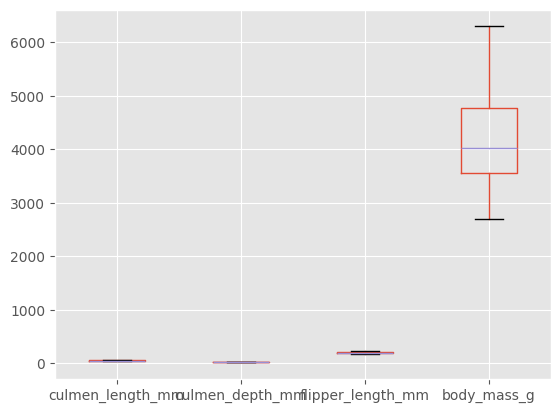

In [81]:
# check for outliers
plt.style.use('ggplot')
penguins_df.boxplot()  
plt.show()

In [82]:
# convert all columns into numeric values
# sex column will be devided into two columns with 1 and 0 for TRUE and FALSE
p_df = pd.get_dummies(penguins_df, dtype='int')
p_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [83]:
# convert the data to scaler form to use ın the unsupervısed learnıng algorithm
scaler = StandardScaler()
X = scaler.fit_transform(p_df)
p_scaled = pd.DataFrame(X, columns = p_df.columns)
p_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


### Perform PCA

[0.52034062 0.34463112 0.08585569 0.0322912  0.01688138 0.        ]


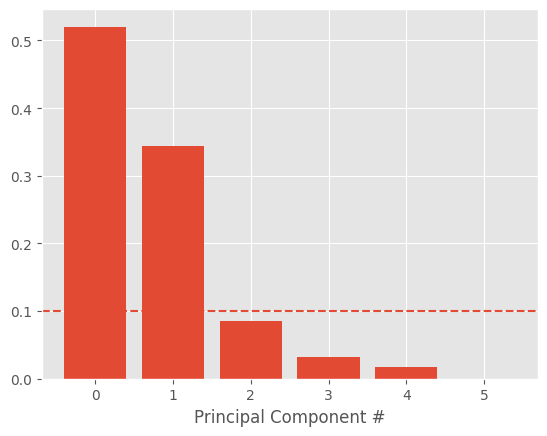

In [84]:
pca = PCA(n_components=None)
default_pca = pca.fit(p_scaled)
exp_variance = default_pca.explained_variance_ratio_
print(exp_variance)

fig,ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.axhline(y=0.1, linestyle='--')
plt.show()

In [85]:
n_components = sum(default_pca.explained_variance_ratio_ > 0.1)
print(f'Number of components: {n_components}')

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(p_scaled)
penguins_PCA[0: 5]

Number of components: 2


array([[-0.71804612,  2.09712541],
       [-1.92706259, -0.40815983],
       [-1.95054409, -0.30487714],
       [-2.28314791,  0.16312656],
       [-0.60857189,  2.51282565]])

### K-Clustering

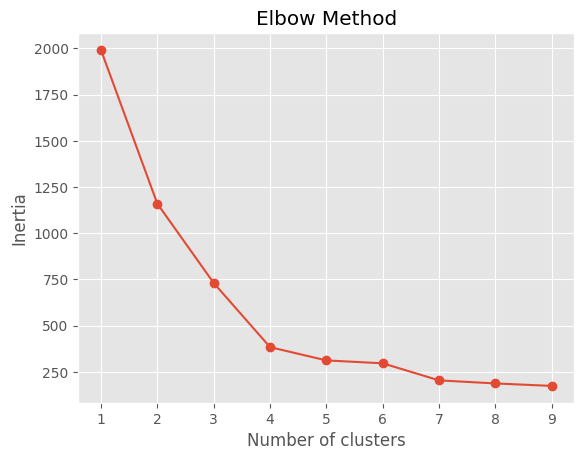

In [86]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(p_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

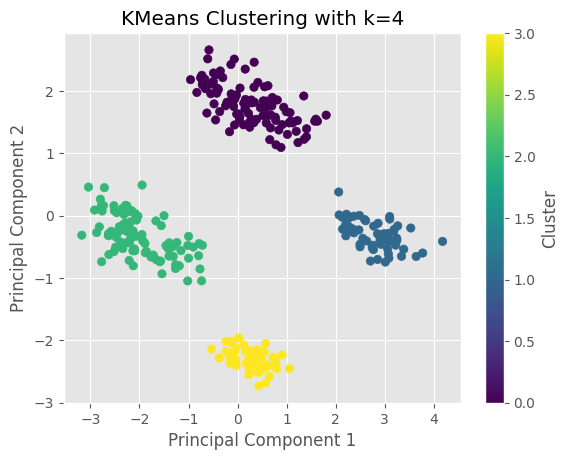

In [87]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering with k={n_clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [88]:
penguins_df['label'] = kmeans.labels_
penguins_df.to_csv('labeled_df.csv', index=False)
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label', 'sex']
stat_penguins = penguins_df.groupby(['label', 'sex']).mean()
print(stat_penguins)

              culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
label sex                                                            
0     MALE           43.878302        19.111321         194.764151   
1     MALE           49.473770        15.718033         221.540984   
2     FEMALE         40.217757        17.611215         189.046729   
3     FEMALE         45.563793        14.237931         212.706897   

              body_mass_g  
label sex                  
0     MALE    4006.603774  
1     MALE    5484.836066  
2     FEMALE  3419.158879  
3     FEMALE  4679.741379  


We can talk about the existence of 4 distinct groups in the data collected, however as the groups get inspected, we can see that in our current model we have 4 groups consisting of only one gender each. We can suspect that sex variable played a role more than it should for us to be able to detect different species in the group.

In [89]:
print(pd.DataFrame(pca.components_,columns=p_scaled.columns))

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          0.434281        -0.155607           0.479181     0.508436   
1         -0.096488         0.612380          -0.309139    -0.187765   

   sex_FEMALE  sex_MALE  
0   -0.386694  0.386694  
1   -0.492371  0.492371  


#### Let's try again without the sex variable

[0.68713344 0.19641564 0.08951723 0.0269337 ]


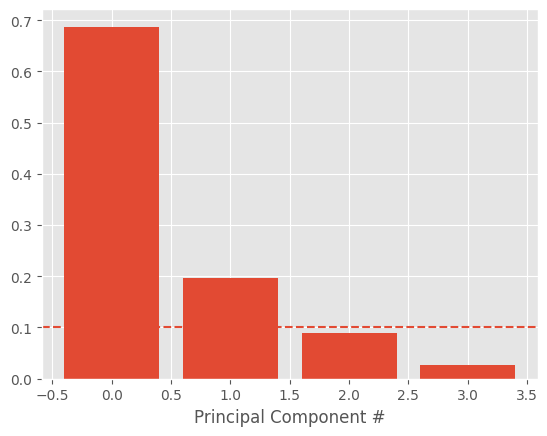

In [90]:
new_p_scaled = p_scaled.drop(columns=['sex_MALE', 'sex_FEMALE'])

pca = PCA(n_components=None)
default_pca = pca.fit(new_p_scaled)
exp_variance = default_pca.explained_variance_ratio_
print(exp_variance)

fig,ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.axhline(y=0.1, linestyle='--')
plt.show()

In [91]:
n_components = sum(default_pca.explained_variance_ratio_ > 0.1)
print(f'Number of components: {n_components}')

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(new_p_scaled)
penguins_PCA[0: 5]

Number of components: 2


array([[-1.85894277,  0.03361733],
       [-1.32096631, -0.44276672],
       [-1.38211326, -0.15755903],
       [-1.89204334, -0.01359484],
       [-1.92705331,  0.81907149]])

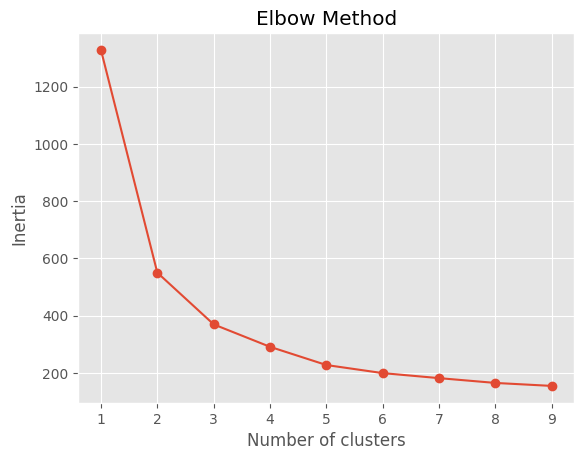

In [92]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(new_p_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

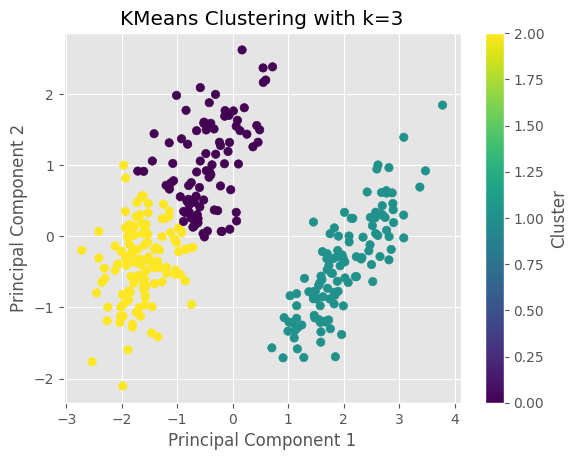

In [93]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering with k={n_clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [94]:
print(pd.DataFrame(pca.components_,columns=new_p_scaled.columns,index = ['PC-1','PC-2']))

      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
PC-1          0.453174        -0.398518           0.576880     0.550478
PC-2          0.604990         0.792959           0.003798     0.072032


With the new numbers in mind we can summarize the averages of each variable as below.

In [ ]:
penguins_df['label'] = kmeans.labels_
penguins_df.to_csv('labeled_df.csv', index=False)
stat_penguins = penguins_df.groupby(['label', 'sex']).mean()
print(stat_penguins)

              culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
label sex                                                            
0     FEMALE         47.162963        17.881481         193.333333   
      MALE           46.809231        19.296923         198.692308   
1     FEMALE         45.563793        14.237931         212.706897   
      MALE           49.473770        15.718033         221.540984   
2     FEMALE         37.873750        17.520000         187.600000   
      MALE           39.231707        18.817073         188.536585   

              body_mass_g  
label sex                  
0     FEMALE  3637.962963  
      MALE    4081.538462  
1     FEMALE  4679.741379  
      MALE    5484.836066  
2     FEMALE  3345.312500  
      MALE    3887.804878  


### Visuals

In [144]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
prepred_stats = penguins_df.groupby('label')[numeric_columns].mean()
prepred_stats

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,46.913043,18.881522,197.119565,3951.358696
1,47.568067,14.996639,217.235294,5092.436975
2,38.333884,17.959504,187.917355,3529.132231


In [145]:
# print(prepred_stats.columns)
prepred_stats1 = prepred_stats.drop(columns='body_mass_g')

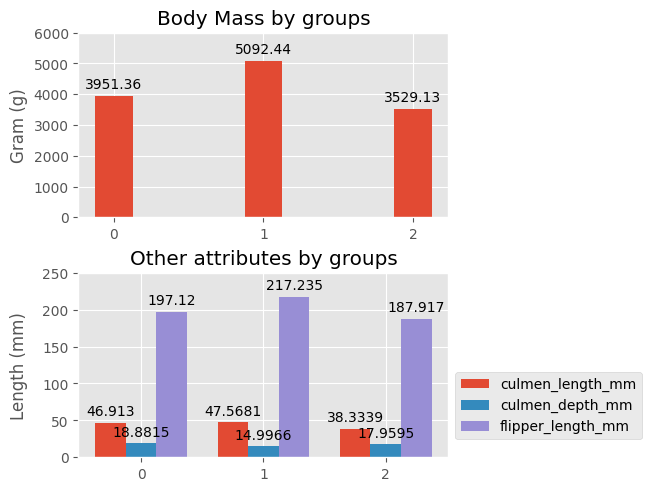

In [168]:
fig, (ax2, ax1) = plt.subplots(2, 1, layout='constrained')

width = 0.25
multiplier = 0

for measure in prepred_stats1.columns:
    rects = ax1.bar(prepred_stats1.index + width*multiplier, prepred_stats1[measure], label=measure, width=width)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

ax1.set_ylabel('Length (mm)')
ax1.set_title('Other attributes by groups')
ax1.set_xticks(np.arange(3) + width, prepred_stats1.index)
ax1.legend(loc='best', ncols=1, bbox_to_anchor=(1, 0.5))
ax1.set_ylim(0, 250)


rects = ax2.bar(prepred_stats.index, prepred_stats['body_mass_g'], label='body mass', width=width)
ax2.bar_label(rects, padding=3)

ax2.set_ylabel('Gram (g)')
ax2.set_title('Body Mass by groups')
ax2.set_xticks(np.arange(3), prepred_stats1.index)
ax2.set_ylim(0, 6000)

fig.align_labels()
fig.align_titles()

plt.show()